   ## Crop Recommendation System

### Importing Required Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [3]:
DS_LOC =  "Crop_recommendation.csv"

In [4]:
df = pd.read_csv(DS_LOC)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.shape

(2200, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Total Features

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Label Dataset

In [9]:
# No. of classes / crops to recommend
num_classes = df['label'].unique().shape[0]
classes = df['label'].unique()

print("Number of classes:", num_classes)
print("Classes:", classes)

Number of classes: 22
Classes: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


### Data Description

In [10]:
### Data Descrition 
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Data Preprocessing

##### data cleaning

In [11]:
# Checking for null values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No null values 

In [12]:
#### Checking Duplicate Value 
print("Total Duplicated Values in Dataset: \n")
df.duplicated().sum()

Total Duplicated Values in Dataset: 



0

### Correlation 

<Axes: >

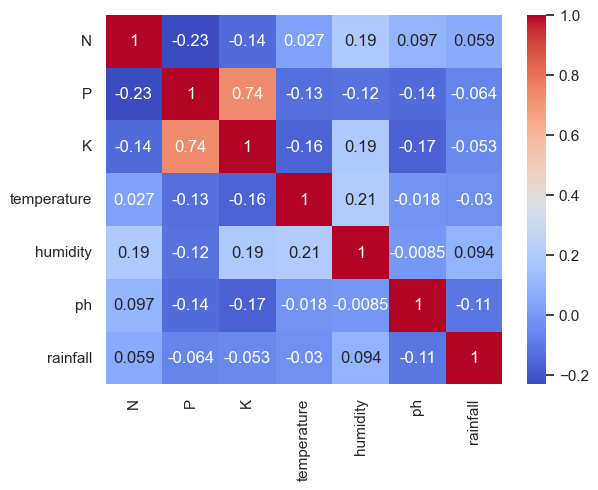

In [13]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Visualizing Class Distribution

<Axes: ylabel='label'>

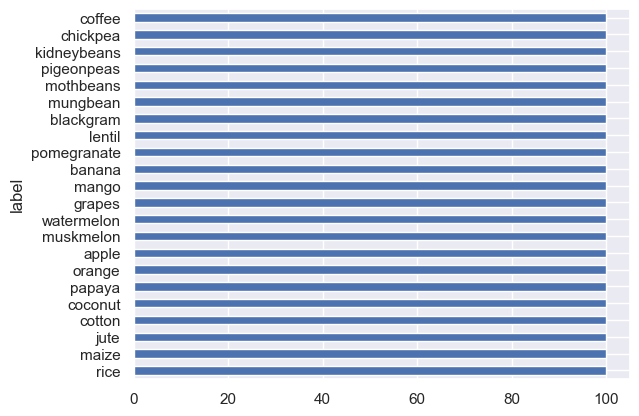

In [14]:
df['label'].value_counts().plot(kind="barh")

Classes are well distributed

In [15]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

We have equal split in all classes so Accuracy is good enough.

# Visualizing Data Attributes

In [16]:
grouped = df.groupby("label")

## Nitrogen

<Axes: ylabel='label'>

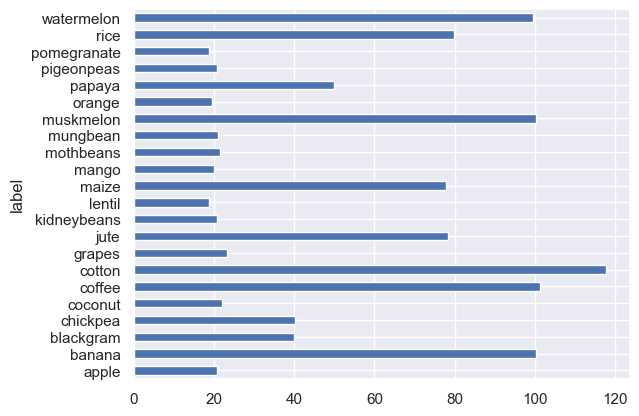

In [17]:
grouped.mean()["N"].plot(kind="barh")

**Findings:** Watermelon, Rice, Papaya, Muskmelon, Maize, Jute, Cotton, Coffee, and Banana require relatively more Nitrogen than the rest of the classes

## Phosphorous 

<Axes: ylabel='label'>

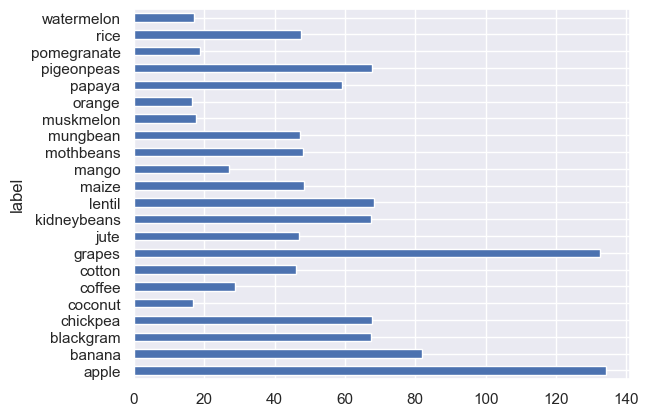

In [18]:
grouped.mean()["P"].plot(kind="barh")

## Potassium

<Axes: ylabel='label'>

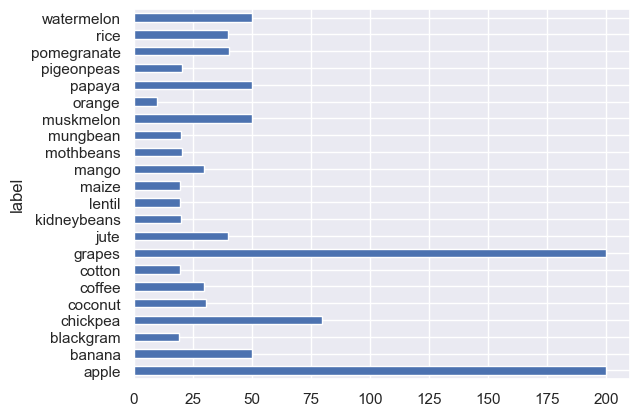

In [19]:
grouped.mean()["K"].plot(kind="barh")

## Temperature

<Axes: ylabel='label'>

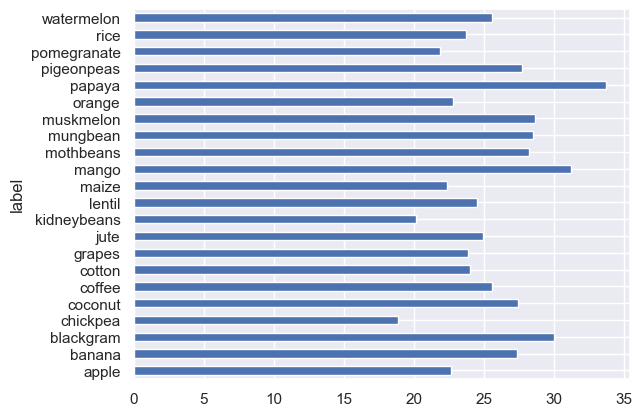

In [20]:
grouped.mean()["temperature"].plot(kind="barh")

## Rainfall

<Axes: ylabel='label'>

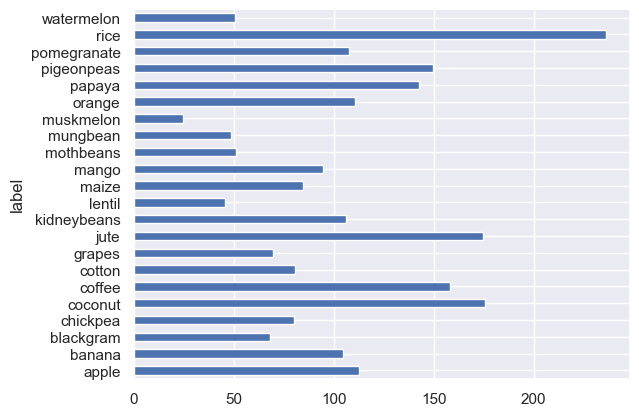

In [21]:
grouped.mean()["rainfall"].plot(kind="barh")

**Findings:** Rice requires considerable amount of rainfall

## Humidity

<Axes: ylabel='label'>

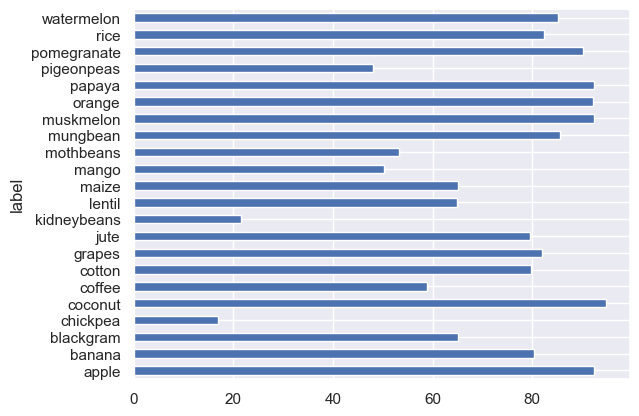

In [22]:
grouped.mean()["humidity"].plot(kind="barh")

**Findings:** Kidneybeans and Chickpeas can grow well even in less humid areas.

That's probably why there are so many fields of these near some desserts like Thal (Pakistan)

## Acidic nature of soil (pH values)

<Axes: ylabel='label'>

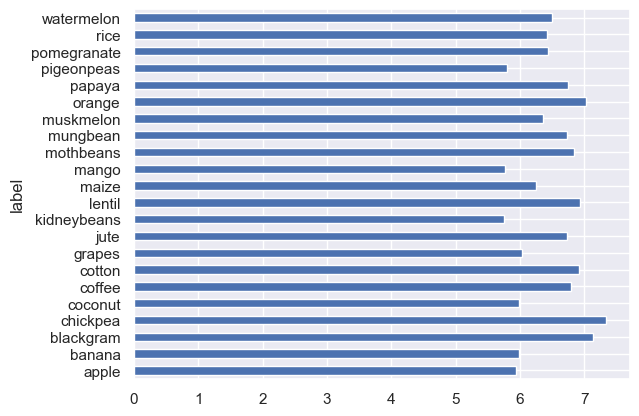

In [23]:
grouped.mean()["ph"].plot(kind="barh")

Summing it up

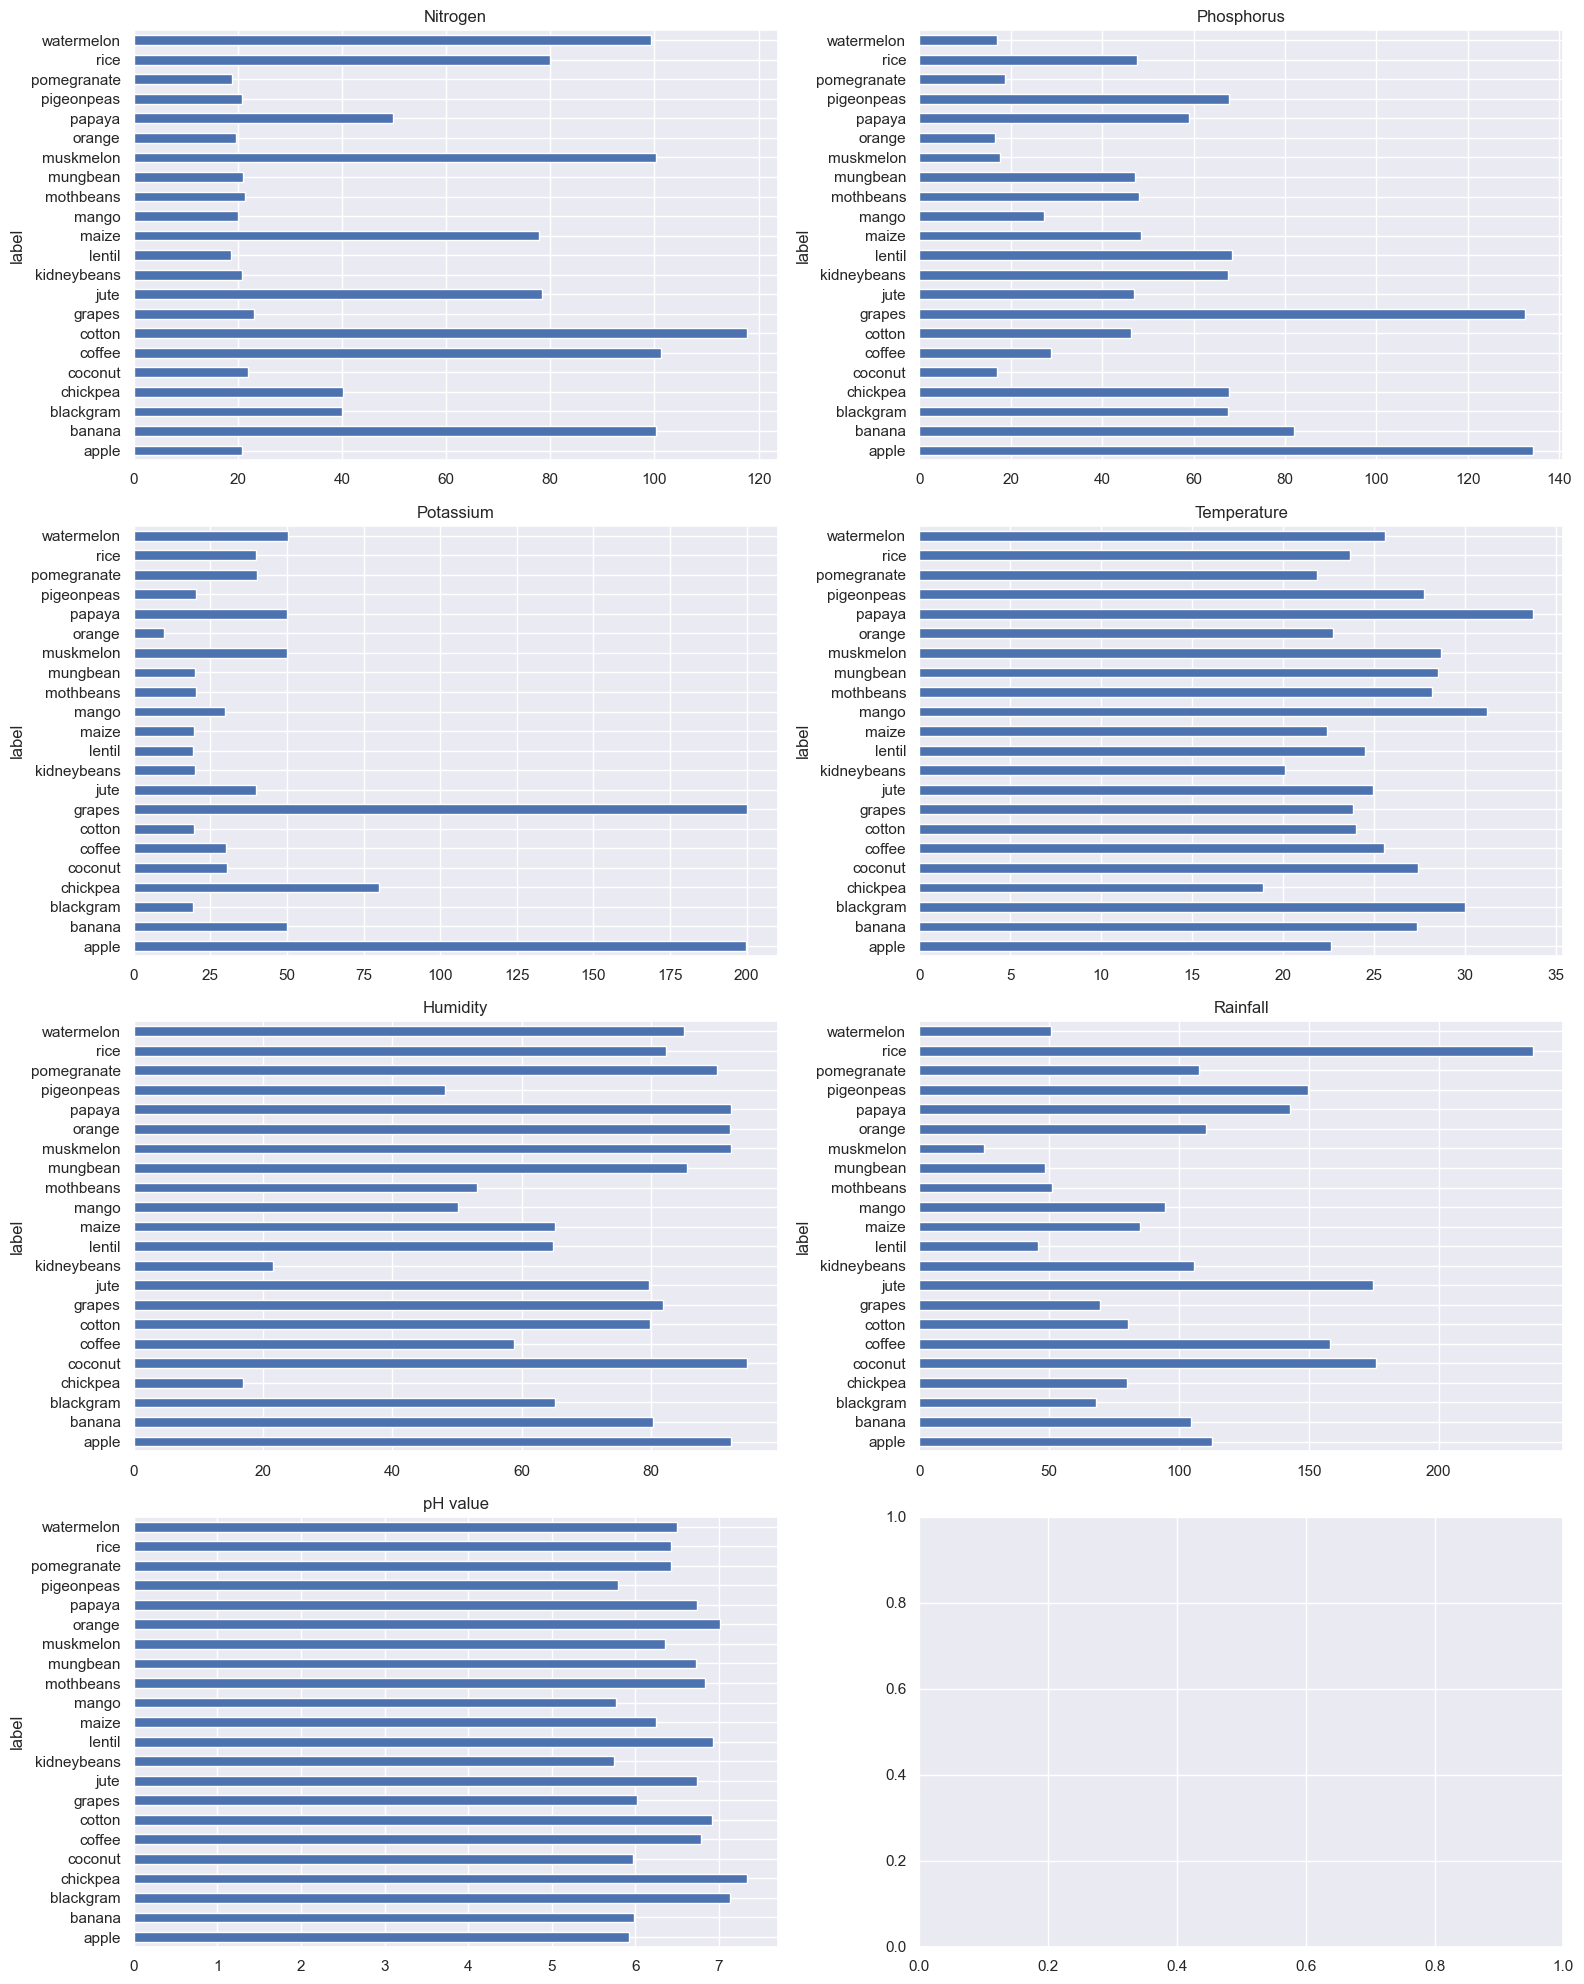

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(16, 20))

ax[0, 0].set_title("Nitrogen")
grouped.mean()["N"].plot(kind="barh", ax=ax[0, 0])
ax[0, 1].set_title("Phosphorus")
grouped.mean()["P"].plot(kind="barh", ax=ax[0, 1])
ax[1, 0].set_title("Potassium")
grouped.mean()["K"].plot(kind="barh", ax=ax[1, 0])
ax[1, 1].set_title("Temperature")
grouped.mean()["temperature"].plot(kind="barh", ax=ax[1, 1])
ax[2, 0].set_title("Humidity")
grouped.mean()["humidity"].plot(kind="barh", ax=ax[2, 0])
ax[2, 1].set_title("Rainfall")
grouped.mean()["rainfall"].plot(kind="barh", ax=ax[2, 1])
ax[3, 0].set_title("pH value")
grouped.mean()["ph"].plot(kind="barh", ax=ax[3, 0])
plt.tight_layout()
plt.show()

### Data Normalization 

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming data_without_outliers is your DataFrame

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

scaled_data_df

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


# Modeling

We are going to apply several techniques:

* Logistic Regression
* Decision Tree
* Random Forest
* K-Nearest Neighbours
* Naive Bayes
* SVM

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

## Creating Train and Test split

In [27]:
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

features = df[feature_columns]
labels = df[["label"]]

In [28]:
train_X, test_X, train_y, test_y = train_test_split(
    features, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

### Training Data

In [29]:
train_X.shape

(1760, 7)

### Testing Data

In [30]:
test_X.shape

(440, 7)

In [31]:
def evaluate(model):
    predictions = model.predict(test_X)
    res = classification_report(predictions, test_y)
    print(res)
    acc = accuracy_score(predictions, test_y)
    return round(acc*100, 3)

## Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(train_X, train_y)

acc = evaluate(model)
print(f"Logistic Regression (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.65      0.68      0.67        19
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.97        19
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.80      0.89        25
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.87      0.93        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      0.89      0.87        19
       maize       0.75      0.83      0.79        18
       mango       1.00      1.00      1.00        20
   mothbeans       0.75      0.75      0.75        20
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

## Decision Tree

In [33]:
model = DecisionTreeClassifier(criterion='gini', 
                               random_state = 42)
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"Decision Tree with Gini (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.80      1.00      0.89        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.90      0.86      0.88        21
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      0.86      0.90        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [34]:
model = DecisionTreeClassifier(criterion='entropy', 
                               random_state = 42)
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"Decision Tree with Entropy (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      0.95      0.98        21
      banana       1.00      1.00      1.00        20
   blackgram       0.85      1.00      0.92        17
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.91      0.95        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       0.95    

## Random Forest

In [35]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"Random Forest (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.97        19
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.95      0.98        21
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

## K-Nearest Neighbors

In [36]:
model = KNeighborsClassifier() # Defaults to 5 neighbors
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"K-Nearest Neighbors (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        20
        jute       0.90      0.78      0.84        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

## Naive Bayes

In [37]:
model = GaussianNB()
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"Naive Bayes (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.91      0.95        22
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

## SVM

In [38]:
model = svm.SVC(kernel='rbf')
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"SVM - radial (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.80      0.89        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [39]:
model = svm.SVC(kernel='linear')
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"SVM - linear (accuracy): {acc}%")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.91      0.95        22
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.90      1.00      0.95        18
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

As we can see, **Random Forest** and **Naive Bayes** gave us the best results.
We can further improve by doing a Cross Validation

### All models

In [40]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM - RBF': svm.SVC(kernel='rbf'),
    'SVM - Linear': svm.SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree - Gini': DecisionTreeClassifier(criterion='gini', random_state = 42),
    'Decision Tree - Entropy': DecisionTreeClassifier(criterion='entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100)
    }


scores = []
for name, md in models.items():
    md.fit(train_X,train_y)
    acc = evaluate(md)
    print(f"{name}  with accuracy : {acc}")
    scores.append(acc)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.65      0.68      0.67        19
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.97        19
      coffee       1.00      1.00      1.00        20
      cotton       1.00      0.80      0.89        25
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.87      0.93        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      0.89      0.87        19
       maize       0.75      0.83      0.79        18
       mango       1.00      1.00      1.00        20
   mothbeans       0.75      0.75      0.75        20
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.95      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

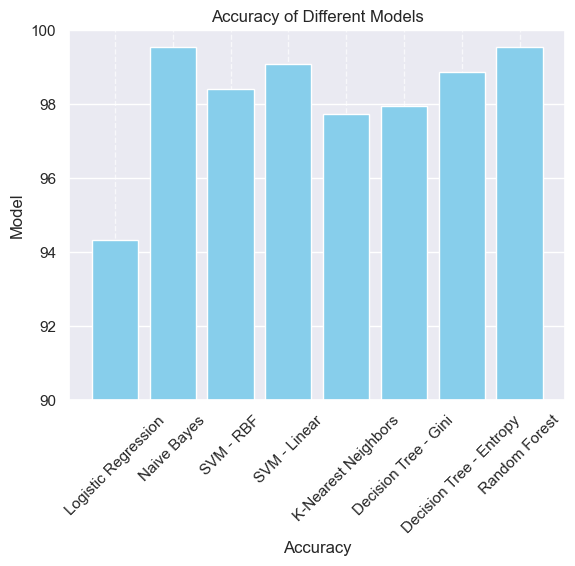

In [41]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
plt.bar(list(models.keys()), scores, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models')
plt.ylim(90, 100)  # Set the x-axis limits to ensure readability (accuracy values range from 0 to 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Cross Validation

In [42]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict 

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
def plot_confusion_matrix(model):
    y_pred = cross_val_predict(model, features, labels, cv=kfold)
    
    matrix = confusion_matrix(labels, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, 
                annot=True, 
                fmt='.0f', 
                annot_kws={'fontsize': 8}, 
                xticklabels=classes, 
                yticklabels=classes)
    plt.tight_layout()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [45]:
def perform_cross_val(model):
    scores = cross_val_score(model, features, labels, cv=kfold)
    mean_score = round(scores.mean()*100, 3)
    
    print(scores)
    print(f"Average score after cross-validation is {mean_score}")

## For Logistic Regression

In [46]:
logistic_reg_model = LogisticRegression()
print("Logistic Regression:")
perform_cross_val(logistic_reg_model)

Logistic Regression:
[0.94545455 0.96363636 0.96363636 0.95681818 0.96363636]
Average score after cross-validation is 95.864


## For Decision Tree

In [47]:
decision_tree_gini = DecisionTreeClassifier(criterion='gini', 
                               max_depth = 12, 
                               random_state = 42)
print("Decision Tree with Gini:")
perform_cross_val(decision_tree_gini)

Decision Tree with Gini:
[0.98636364 0.97954545 0.99772727 0.98409091 0.98636364]
Average score after cross-validation is 98.682


In [48]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', 
                               max_depth = 12, 
                               random_state = 42)
print("Decision Tree with Entropy:")
perform_cross_val(decision_tree_entropy)

Decision Tree with Entropy:
[0.97954545 0.97954545 0.98409091 0.99545455 0.98181818]
Average score after cross-validation is 98.409


## For Random Forest

In [49]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Random Forest:")
perform_cross_val(random_forest_model)

Random Forest:
[0.99318182 0.98863636 0.99772727 0.99772727 0.99772727]
Average score after cross-validation is 99.5


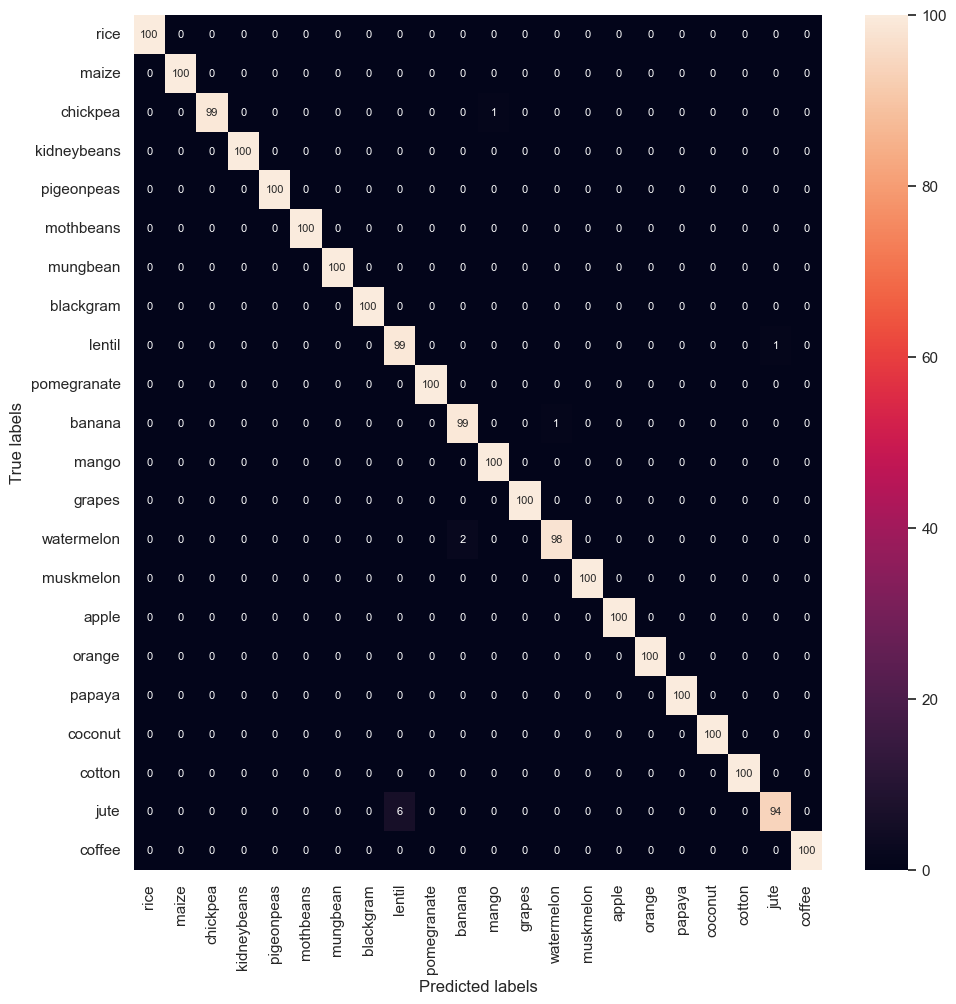

In [50]:
plot_confusion_matrix(random_forest_model)

In [51]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)

RandomForestClassifier()

In [52]:
rice_sample = np.array([[74, 35, 40, 26.491096, 80.158363, 6.980401, 242.864034]])
model.predict(rice_sample)

array(['rice'], dtype=object)

## For KNN

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=3)

print("K-Nearest Neighbors:")
perform_cross_val(knn_model)

K-Nearest Neighbors:
[0.97045455 0.98181818 0.98863636 0.98409091 0.98181818]
Average score after cross-validation is 98.136


In [54]:
knn_model = KNeighborsClassifier(n_neighbors=5)

print("K-Nearest Neighbors:")
perform_cross_val(knn_model)

K-Nearest Neighbors:
[0.97045455 0.97727273 0.98636364 0.98863636 0.97954545]
Average score after cross-validation is 98.045


In [55]:
knn_model = KNeighborsClassifier(n_neighbors=7)

print("K-Nearest Neighbors:")
perform_cross_val(knn_model)

K-Nearest Neighbors:
[0.96818182 0.975      0.98636364 0.98863636 0.98409091]
Average score after cross-validation is 98.045


## For Naive Bayes

In [56]:
naive_bayes_model = GaussianNB()

print("Naive Bayes:")
perform_cross_val(naive_bayes_model)

Naive Bayes:
[0.99545455 0.99090909 0.99545455 0.99545455 0.99772727]
Average score after cross-validation is 99.5


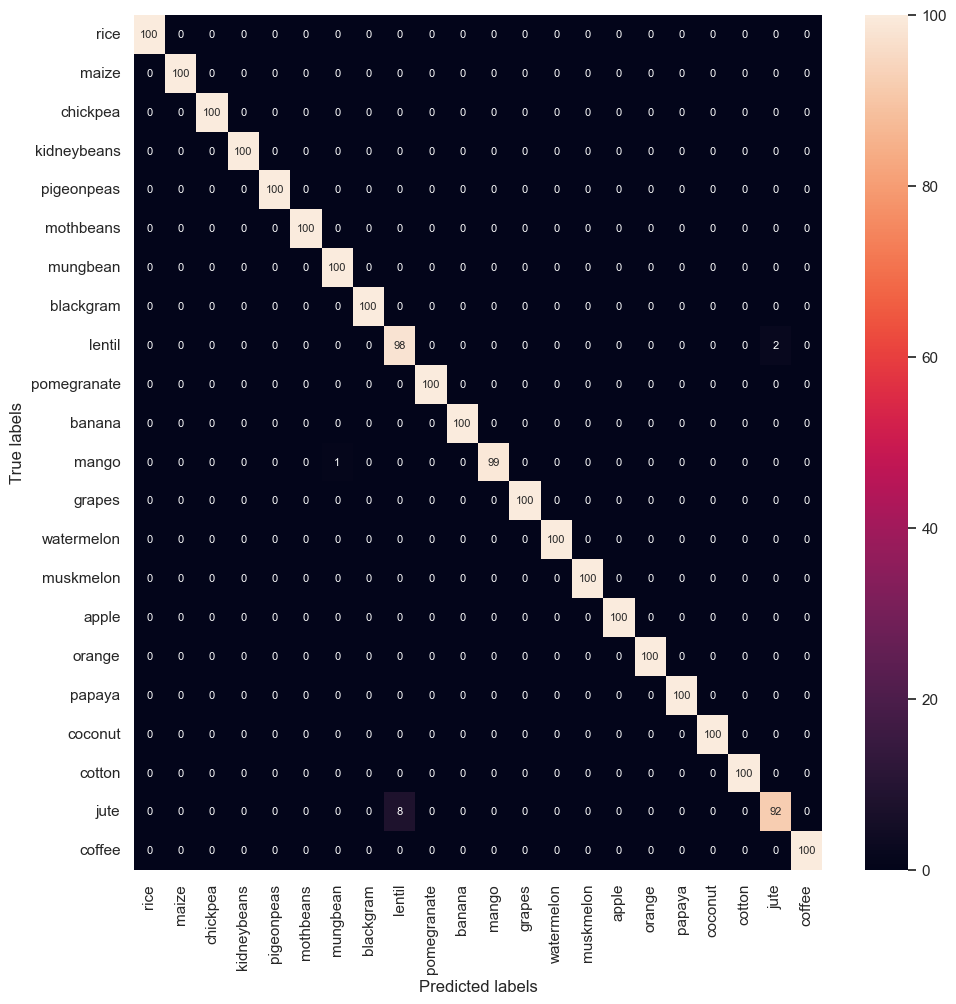

In [57]:
plot_confusion_matrix(naive_bayes_model)

In [58]:
naive_bayes_model.fit(features, labels)

GaussianNB()

In [59]:
rice_sample = np.array([[74, 35, 40, 26.491096, 80.158363, 6.980401, 242.864034]])
naive_bayes_model.predict(rice_sample)

array(['rice'], dtype='<U11')

## For SVM

In [60]:
svm_model = svm.SVC(kernel="rbf")
print("SVM with Radial kernel:")
perform_cross_val(svm_model)

SVM with Radial kernel:
[0.96136364 0.97727273 0.97727273 0.98409091 0.98409091]
Average score after cross-validation is 97.682


In [61]:
svm_model = svm.SVC(kernel="linear")
print("SVM with Linear kernel:")
perform_cross_val(svm_model)

SVM with Linear kernel:
[0.97954545 0.98181818 0.99545455 0.99090909 0.98636364]
Average score after cross-validation is 98.682
